In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# from sklearn.metrics import 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
y_test_actual = (
    pd.read_csv("../processed_data/y_test.csv")
    .rename(columns = {'audio_path': 'index'})
    .set_index('index')
    .sort_index()
    )

y_pred_lyrics = (
    pd.read_csv("../processed_data/y_pred_lyrics.csv")
    .rename(columns = {'audio_path': 'index'})
    .set_index('index')
    .sort_index()
    )

y_pred_chroma = (
    pd.read_csv("../processed_data/y_pred_chroma.csv")
    .rename(columns = {'audio_path': 'index'})
    .set_index('index')
    .sort_index()
    )

In [3]:
def get_col_wise_accuracy(A, B):
    accuracy = [accuracy_score(A[col], B[col]) for col in A.columns]
    # precision = [precision_score(A[col], B[col]) for col in A.columns]

    return (
        pd.DataFrame(
            accuracy, 
            index = A.columns, 
            columns=['accuracy']
            )
        )

In [4]:
def accuracy_score_(df1, df2):
    scores = []
    for r1, r2 in zip(list(df1.iterrows()), list(df2.iterrows())):
        scores.append(accuracy_score(r1[1], r2[1]))
    
    return round(sum(scores) / len(scores), 3)

In [5]:
print(f"Overall Lyrics Prediction Accuracy: {accuracy_score_(y_test_actual, y_pred_lyrics)}")

lyrics_accuracy = get_col_wise_accuracy(y_test_actual, y_pred_lyrics)
lyrics_accuracy.sort_values('accuracy')

Overall Lyrics Prediction Accuracy: 0.795


,accuracy
Emotion-Happy,0.69
Emotion-Emotional_/_Passionate,0.69
Emotion-Positive_/_Optimistic,0.72
Emotion-Exciting_/_Thrilling,0.77
Emotion-Laid-back_/_Mellow,0.78
Emotion-Cheerful_/_Festive,0.79
Emotion-Sad,0.85
Emotion-Angry_/_Agressive,0.86
Emotion-Loving_/_Romantic,0.86
Emotion-Bizarre_/_Weird,0.94


In [6]:
print(f"Overall Chroma Prediction Accuracy: {accuracy_score_(y_test_actual, y_pred_chroma)}")


chroma_accuracy = get_col_wise_accuracy(y_test_actual, y_pred_chroma)
chroma_accuracy.sort_values('accuracy')

Overall Chroma Prediction Accuracy: 0.791


,accuracy
Emotion-Emotional_/_Passionate,0.62
Emotion-Exciting_/_Thrilling,0.68
Emotion-Cheerful_/_Festive,0.76
Emotion-Happy,0.79
Emotion-Positive_/_Optimistic,0.79
Emotion-Laid-back_/_Mellow,0.80
Emotion-Sad,0.83
Emotion-Loving_/_Romantic,0.84
Emotion-Angry_/_Agressive,0.86
Emotion-Bizarre_/_Weird,0.94


In [7]:
joint_accuracy = chroma_accuracy.join(
    lyrics_accuracy, lsuffix="_chroma", rsuffix="_lyrics"
).sort_values("accuracy_lyrics")
joint_accuracy

,accuracy_chroma,accuracy_lyrics
Emotion-Happy,0.79,0.69
Emotion-Emotional_/_Passionate,0.62,0.69
Emotion-Positive_/_Optimistic,0.79,0.72
Emotion-Exciting_/_Thrilling,0.68,0.77
Emotion-Laid-back_/_Mellow,0.80,0.78
Emotion-Cheerful_/_Festive,0.76,0.79
Emotion-Sad,0.83,0.85
Emotion-Angry_/_Agressive,0.86,0.86
Emotion-Loving_/_Romantic,0.84,0.86
Emotion-Bizarre_/_Weird,0.94,0.94


<Axes: >

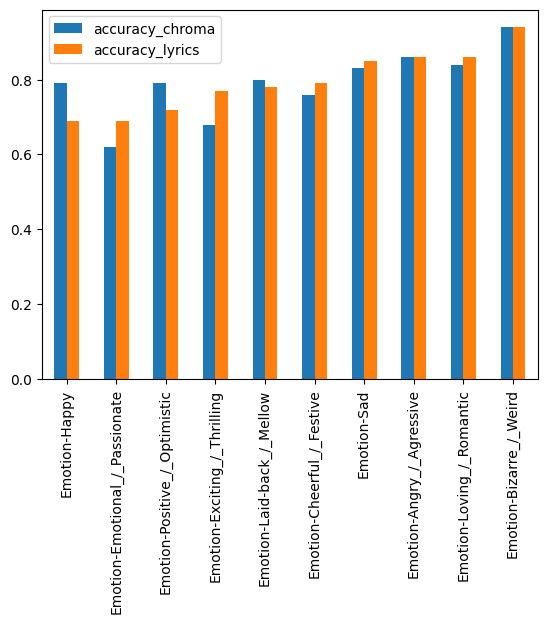

In [8]:
joint_accuracy.plot.bar()

## Combiner Model

In [9]:
import keras
import tensorflow as tf

tf.config.experimental.list_physical_devices("GPU")

2024-05-08 07:27:34.930454: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-08 07:27:34.991678: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 07:27:35.901596: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-08 07:27:36.617768: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2024-05-08 07:27:36.699420: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-08 07:27:36.699487: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [10]:
# merge horizontally on index
y_pred_combined = y_pred_lyrics.join(y_pred_chroma, lsuffix="_lyrics", rsuffix="_chroma")
y_pred_combined

,Emotion-Happy_lyrics,Emotion-Positive_/_Optimistic_lyrics,Emotion-Sad_lyrics,Emotion-Emotional_/_Passionate_lyrics,Emotion-Angry_/_Agressive_lyrics,Emotion-Exciting_/_Thrilling_lyrics,Emotion-Laid-back_/_Mellow_lyrics,Emotion-Loving_/_Romantic_lyrics,Emotion-Cheerful_/_Festive_lyrics,Emotion-Bizarre_/_Weird_lyrics,Emotion-Happy_chroma,Emotion-Positive_/_Optimistic_chroma,Emotion-Sad_chroma,Emotion-Emotional_/_Passionate_chroma,Emotion-Angry_/_Agressive_chroma,Emotion-Exciting_/_Thrilling_chroma,Emotion-Laid-back_/_Mellow_chroma,Emotion-Loving_/_Romantic_chroma,Emotion-Cheerful_/_Festive_chroma,Emotion-Bizarre_/_Weird_chroma
index,,,,,,,,,,,,,,,,,,,,
10cc-for_you_and_i,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5th_dimension-one_less_bell_to_answer,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
adam_ant-wonderful,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
aerobic_jonquil-sweat_machine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
al_green-sha-la-la_make_me_happy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
williamson-whats_on_the_ceiling_beats_whats_on_tv,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
xtc-love_at_first_sight,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
yes-leave_it,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [52]:
# train test split y_pred_combined and y_test_actual
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    y_pred_combined, y_test_actual, test_size=0.2, random_state=11
)

In [124]:
tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)

tf.keras.metrics.Precision(
    thresholds=None, top_k=None, class_id=None, name=None, dtype=None
)


input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

combiner_model = keras.Sequential()

combiner_model.add(keras.layers.Dense(20, activation="relu", input_dim=input_dim))
# combiner_model.add(keras.layers.Dense(40, activation="relu"))
combiner_model.add(keras.layers.Dropout(0.2))
# combiner_model.add(keras.layers.Dense(15, activation="relu"))
combiner_model.add(keras.layers.Dense(output_dim, activation="sigmoid"))

combiner_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision()],
)

/home/snaekboi/miniconda3/envs/mood_recognition/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:
combiner_model.fit(X_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.5110 - loss: 0.7240 - precision_65: 0.1923
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5019 - loss: 0.7091 - precision_65: 0.1586
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5217 - loss: 0.6985 - precision_65: 0.1661
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6143 - loss: 0.6771 - precision_65: 0.2007 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6605 - loss: 0.6588 - precision_65: 0.2029 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6896 - loss: 0.6490 - precision_65: 0.2282 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6930 - loss: 0.6454 - precision_65: 0.2134 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7254 - loss: 0.6294 - precision_65: 0.2077 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.755

In [126]:
combined_predictions = (combiner_model.predict(X_test) > 0.5).astype(int)

y_pred_combined_model = pd.DataFrame(
    combined_predictions,
    columns = y_test.columns,
    index = y_test.index
)

y_pred_combined_model.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


,Emotion-Happy,Emotion-Positive_/_Optimistic,Emotion-Sad,Emotion-Emotional_/_Passionate,Emotion-Angry_/_Agressive,Emotion-Exciting_/_Thrilling,Emotion-Laid-back_/_Mellow,Emotion-Loving_/_Romantic,Emotion-Cheerful_/_Festive,Emotion-Bizarre_/_Weird
index,,,,,,,,,,
john_coltrane-giant_steps,0,0,0,0,0,0,0,0,0,0
kris_kristofferson-the_best_of_all_possible_worlds,0,0,0,1,0,0,0,1,0,0
bob_seger-turn_the_page,0,0,0,1,0,0,0,0,0,0
natalie_imbruglia-torn,0,0,0,0,0,0,0,0,0,0
elliott_smith-baby_britain,0,0,0,1,0,0,0,0,0,0


In [127]:
print(f"Overall Combined Model Prediction Accuracy: {accuracy_score_(y_test, y_pred_combined_model)}")

combined_accuracy = get_col_wise_accuracy(y_test, y_pred_combined_model)
combined_accuracy.sort_values('accuracy')

Overall Combined Model Prediction Accuracy: 0.81


,accuracy
Emotion-Emotional_/_Passionate,0.60
Emotion-Happy,0.75
Emotion-Exciting_/_Thrilling,0.75
Emotion-Positive_/_Optimistic,0.80
Emotion-Laid-back_/_Mellow,0.80
Emotion-Cheerful_/_Festive,0.80
Emotion-Sad,0.85
Emotion-Loving_/_Romantic,0.85
Emotion-Angry_/_Agressive,0.95
Emotion-Bizarre_/_Weird,0.95


Final Accuracies:
- lyrics model: 0.795
- audio model: 0.791
- combiner model: 0.81